<a href="https://colab.research.google.com/github/fillipesansilva/Livraria/blob/master/exec4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


O dataset é composto por dados coletados durante 3 meses pela Telecom Italia.

Os dados representam o volume de tráfego agregado a cada 10 min.

Primeira coluna = date-time

Segunda coluna = volume do tráfego

**O Ojetivo é tentar agrupar o volume do tráfego em 3 grupos: baixa, média e alta demanda.**

In [2]:
import pandas as pd
import numpy as np
from pandas import datetime
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer
from plotnine import *

def date_parser(x):
	return datetime.strptime(x, '%Y-%m-%d %H:%M:%S')

dados = pd.read_csv("/content/drive/My Drive/Colab Notebooks/semana1/grid1.csv", parse_dates=[0], date_parser=date_parser)
dados = dados[:8782] #somente 2 meses
dados.head()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime instead.
  if __name__ == '__main__':


,timestamp,demand
0,2013-11-01 00:10:00,11.127101
1,2013-11-01 00:20:00,10.892771
2,2013-11-01 00:30:00,8.622425
3,2013-11-01 00:40:00,8.009927
4,2013-11-01 00:50:00,8.118420


### **Tratando os dados.**

In [3]:
#month	day	hour	minute demand

dados['new_date'] = [str(d.date()) for d in dados['timestamp']]
dados['new_time'] = [str(d.time()) for d in dados['timestamp']]

dados['month'] = [float(d.split("-")[1]) for d in dados['new_date']]
dados['day'] = [float(d.split("-")[2]) for d in dados['new_date']]
dados['hour'] = [float(d.split(":")[0]) for d in dados['new_time']]
dados['minute'] = [float(d.split(":")[1]) for d in dados['new_time']]

dados['M11'] = [1 if x == 11 else 0 for x in dados['month']]
dados['M12'] = [1 if x == 12 else 0 for x in dados['month']]

dados['D1'] = [1 if x == 1 else 0 for x in dados['day']]                                                                     
dados['D2'] = [1 if x == 2 else 0 for x in dados['day']]                                                                     
dados['D3'] = [1 if x == 3 else 0 for x in dados['day']]                                                                     
dados['D4'] = [1 if x == 4 else 0 for x in dados['day']]                                                                     
dados['D5'] = [1 if x == 5 else 0 for x in dados['day']]                                                                     
dados['D6'] = [1 if x == 6 else 0 for x in dados['day']]                                                                     
dados['D7'] = [1 if x == 7 else 0 for x in dados['day']]                                                                     
dados['D8'] = [1 if x == 8 else 0 for x in dados['day']]                                                                     
dados['D9'] = [1 if x == 9 else 0 for x in dados['day']]                                                                     
dados['D10'] = [1 if x == 10 else 0 for x in dados['day']]                                                                   
dados['D11'] = [1 if x == 11 else 0 for x in dados['day']]                                                                   
dados['D12'] = [1 if x == 12 else 0 for x in dados['day']]                                                                   
dados['D13'] = [1 if x == 13 else 0 for x in dados['day']]                                                                   
dados['D14'] = [1 if x == 14 else 0 for x in dados['day']]                                                                   
dados['D15'] = [1 if x == 15 else 0 for x in dados['day']]                                                                   
dados['D16'] = [1 if x == 16 else 0 for x in dados['day']]                                                                   
dados['D17'] = [1 if x == 17 else 0 for x in dados['day']]                                                                   
dados['D18'] = [1 if x == 18 else 0 for x in dados['day']]                                                                   
dados['D19'] = [1 if x == 19 else 0 for x in dados['day']]                                                                   
dados['D20'] = [1 if x == 20 else 0 for x in dados['day']]                                                                   
dados['D21'] = [1 if x == 21 else 0 for x in dados['day']]                                                                   
dados['D22'] = [1 if x == 22 else 0 for x in dados['day']]                                                                   
dados['D23'] = [1 if x == 23 else 0 for x in dados['day']]                                                                   
dados['D24'] = [1 if x == 24 else 0 for x in dados['day']]                                                                   
dados['D25'] = [1 if x == 25 else 0 for x in dados['day']]                                                                   
dados['D26'] = [1 if x == 26 else 0 for x in dados['day']]                                                                   
dados['D27'] = [1 if x == 27 else 0 for x in dados['day']]                                                                   
dados['D28'] = [1 if x == 28 else 0 for x in dados['day']]                                                                   
dados['D29'] = [1 if x == 29 else 0 for x in dados['day']]                                                                   
dados['D30'] = [1 if x == 30 else 0 for x in dados['day']]                                                                   
dados['D31'] = [1 if x == 31 else 0 for x in dados['day']]

dados['H0'] = [1 if x == 0 else 0 for x in dados['hour']]                 
dados['H1'] = [1 if x == 1 else 0 for x in dados['hour']]                 
dados['H2'] = [1 if x == 2 else 0 for x in dados['hour']]                 
dados['H3'] = [1 if x == 3 else 0 for x in dados['hour']]                 
dados['H4'] = [1 if x == 4 else 0 for x in dados['hour']]                 
dados['H5'] = [1 if x == 5 else 0 for x in dados['hour']]                 
dados['H6'] = [1 if x == 6 else 0 for x in dados['hour']]                 
dados['H7'] = [1 if x == 7 else 0 for x in dados['hour']]                 
dados['H8'] = [1 if x == 8 else 0 for x in dados['hour']]                 
dados['H9'] = [1 if x == 9 else 0 for x in dados['hour']]                 
dados['H10'] = [1 if x == 10 else 0 for x in dados['hour']]               
dados['H11'] = [1 if x == 11 else 0 for x in dados['hour']]               
dados['H12'] = [1 if x == 12 else 0 for x in dados['hour']]               
dados['H13'] = [1 if x == 13 else 0 for x in dados['hour']]               
dados['H14'] = [1 if x == 14 else 0 for x in dados['hour']]               
dados['H15'] = [1 if x == 15 else 0 for x in dados['hour']]               
dados['H16'] = [1 if x == 16 else 0 for x in dados['hour']]               
dados['H17'] = [1 if x == 17 else 0 for x in dados['hour']]               
dados['H18'] = [1 if x == 18 else 0 for x in dados['hour']]               
dados['H19'] = [1 if x == 19 else 0 for x in dados['hour']]               
dados['H20'] = [1 if x == 20 else 0 for x in dados['hour']]               
dados['H21'] = [1 if x == 21 else 0 for x in dados['hour']]               
dados['H22'] = [1 if x == 22 else 0 for x in dados['hour']]               
dados['H23'] = [1 if x == 23 else 0 for x in dados['hour']]

dados['MIN0'] = [1 if x == 0 else 0 for x in dados['minute']]             
dados['MIN10'] = [1 if x == 10 else 0 for x in dados['minute']]           
dados['MIN20'] = [1 if x == 20 else 0 for x in dados['minute']]           
dados['MIN30'] = [1 if x == 30 else 0 for x in dados['minute']]           
dados['MIN40'] = [1 if x == 40 else 0 for x in dados['minute']]           
dados['MIN50'] = [1 if x == 50 else 0 for x in dados['minute']]

dados.to_csv("/content/drive/My Drive/Colab Notebooks/semana1/t.csv", sep='\t')


dados.head()

,timestamp,demand,new_date,new_time,month,day,hour,minute,M11,M12,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,H0,H1,H2,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12,H13,H14,H15,H16,H17,H18,H19,H20,H21,H22,H23,MIN0,MIN10,MIN20,MIN30,MIN40,MIN50
0,2013-11-01 00:10:00,11.127101,2013-11-01,00:10:00,11.0,1.0,0.0,10.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,2013-11-01 00:20:00,10.892771,2013-11-01,00:20:00,11.0,1.0,0.0,20.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,2013-11-01 00:30:00,8.622425,2013-11-01,00:30:00,11.0,1.0,0.0,30.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,2013-11-01 00:40:00,8.009927,2013-11-01,00:40:00,11.0,1.0,0.0,40.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,2013-11-01 00:50:00,8.118420,2013-11-01,00:50:00,11.0,1.0,0.0,50.0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [4]:
n_dados = dados.drop(["timestamp","new_date","new_date","new_time",	"month",	"day",	"hour",	"minute"], axis ="columns")
n_dados

,demand,M11,M12,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,H0,H1,H2,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12,H13,H14,H15,H16,H17,H18,H19,H20,H21,H22,H23,MIN0,MIN10,MIN20,MIN30,MIN40,MIN50
0,11.127101,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,10.892771,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,8.622425,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,8.009927,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,8.118420,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8777,12.245558,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
8778,13.740447,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
8779,13.405484,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
8780,14.344925,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


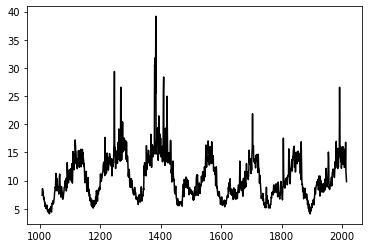

In [5]:
import matplotlib.pyplot as plt, pylab
plt.plot(n_dados["demand"][1008:1008*2], "black")


É possível notar claramente que o volume de tráfego exibe certa periodicidade (nos padrões diários e semanais) como resultado de horários de trabalho regulares.
O volume de tráfego é maior durante o horário de trabalho do que à meia-noite e menor nos finais de semana do que durante a semana.
Com base nessas recorrências, vamos tentar agrupar o volume de tráfego em baixa, média e alta demanda.

*Infelizmente não tenho as labels para validar os grupos. Isso será legal :D.

In [6]:
X = n_dados.iloc[:, 0:]
X

,demand,M11,M12,D1,D2,D3,D4,D5,D6,D7,D8,D9,D10,D11,D12,D13,D14,D15,D16,D17,D18,D19,D20,D21,D22,D23,D24,D25,D26,D27,D28,D29,D30,D31,H0,H1,H2,H3,H4,H5,H6,H7,H8,H9,H10,H11,H12,H13,H14,H15,H16,H17,H18,H19,H20,H21,H22,H23,MIN0,MIN10,MIN20,MIN30,MIN40,MIN50
0,11.127101,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
1,10.892771,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
2,8.622425,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,8.009927,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,8.118420,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8777,12.245558,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0
8778,13.740447,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0
8779,13.405484,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0
8780,14.344925,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0


### **K-means & AgglomerativeClustering**


In [7]:
from sklearn.cluster import KMeans, AgglomerativeClustering

In [8]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)
kmeans_labels = kmeans.predict(X)

In [9]:
kmeans_labels

array([1, 1, 0, ..., 2, 2, 1], dtype=int32)

In [10]:
hierarquico = AgglomerativeClustering(n_clusters=3)
hierarquico_labels = hierarquico.fit(X).labels_

In [11]:
hierarquico_labels

array([2, 2, 0, ..., 2, 1, 2])

In [12]:
XX = X.copy()

grupos_k_means = pd.DataFrame(kmeans_labels)
XX.insert((XX.shape[1]),'grupos_k_means',grupos_k_means)

grupos_hierarquico = pd.DataFrame(hierarquico_labels)
XX.insert((XX.shape[1]),'grupos_hierarquico',grupos_hierarquico)

Yaxis = pd.DataFrame([x for x in range(0,len(XX),10)])
XX.insert((XX.shape[1]),'Yaxis',Yaxis)

### **Análise visual**

Análise visual dos grupos gerados por **KMEANS**

/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:360: PlotnineWarning: stat_summary : Removed 7903 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


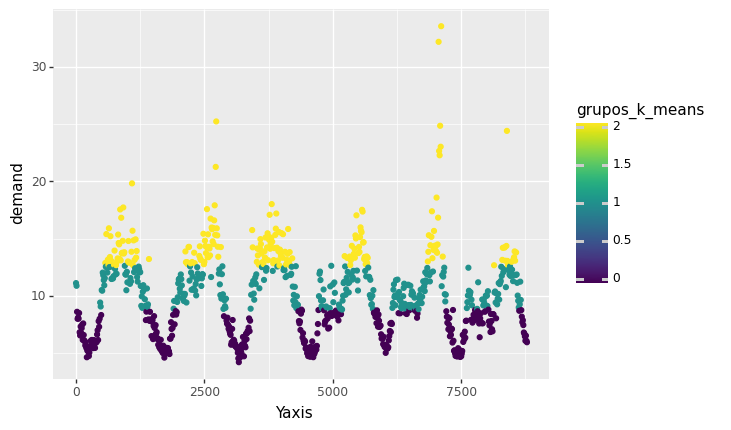

<ggplot: (-9223363254765479259)>

In [13]:
ggplot(XX, aes(x='Yaxis', y='demand', color='grupos_k_means')) + geom_point(stat='summary')

Análise visual dos grupos gerados por **AgglomerativeClustering**

/usr/local/lib/python3.6/dist-packages/plotnine/layer.py:360: PlotnineWarning: stat_summary : Removed 7903 rows containing non-finite values.
  data = self.stat.compute_layer(data, params, layout)


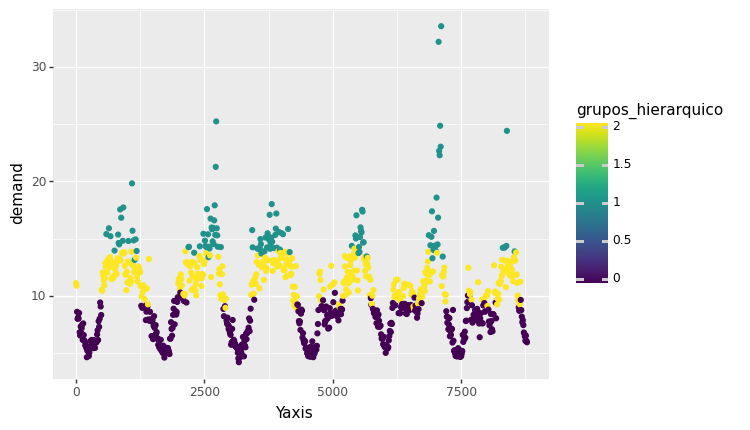

<ggplot: (8782086600754)>

In [14]:
ggplot(XX, aes(x='Yaxis', y='demand', color='grupos_hierarquico')) + geom_point(stat='summary')

## **Conclusão da análise visual**

Os dois métodos mostram resultados visuais satisfatório ao agrupar o volume de tráfego em 3 faixas: 

1.   **baixa** (demanda<10), 
2.   **média** (15< demanda >10), e
3.   **alta** (demanda>15) demanda.


### **Avaliação numérica**

Os métodos utilizados para a avaliação numérica medem a similaridade intra-grupo e dissimilaridade entre instâncias de grupos diferentes, já que o dataset não oferece labels dos grupos.

In [15]:
from sklearn.metrics import davies_bouldin_score, silhouette_score, calinski_harabasz_score

In [16]:
#indice Davies-Boldin
db_kmeans = davies_bouldin_score(X,kmeans_labels)
db_hierarquico = davies_bouldin_score(X,hierarquico_labels)

print("db_kmeans: " + str(db_kmeans) + " db_hierarquico: " + str(db_hierarquico))

db_kmeans: 1.1395455190241714 db_hierarquico: 1.1600628096859402


In [17]:
#coeficiente de silhueta
ss_kmeans = silhouette_score(X,kmeans_labels, metric='euclidean')
ss_hierarquico = silhouette_score(X,hierarquico_labels, metric='euclidean')

print("ss_kmeans: " + str(ss_kmeans) + " ss_hierarquico: " + str(ss_hierarquico))

ss_kmeans: 0.28269646157205075 ss_hierarquico: 0.2855934899335305


In [18]:
#indice de Calinski-Harabasz
ch_kmeans = calinski_harabasz_score(X,kmeans_labels)
ch_hierarquico = calinski_harabasz_score(X,hierarquico_labels)

print("ch_kmeans: " + str(ch_kmeans) + " ch_hierarquico: " + str(ch_hierarquico))

ch_kmeans: 7355.240145946234 ch_hierarquico: 6844.954939731145


### **Conclusão**


Ambos os modelos apresentaram resultados similares e ideais, tanto visuais quanto númericos.

Uma das possíveis aplicações:

Suponha um cenário onde o volume de tráfego é predito e classificado em 3 grupos: baixa, média ou alta demanda. Com isso, é possível alocar ou remover recursos da infraestrutura da rede ao saber que grupo a demanda predita pertence. Isso parece interessante :D.


